#**Abstract**




In a world full of different products and services offered by many different companies, it is natural for people to be curious about the quality of a certain solution. Moreover, companies want to sell their products and services 

to the best of their abilities. In doing so, not only do they retain their customer base, but also gain a profit. To deliver a better product, it is vital to understand how the masses perceive the current version of the solution. But it is tedious to analyze thousands of human written reviews manually especially withholding bias. To overcome this problem, we can use ML (Machine Learning) and NLP (Natural Language Processing) to automate the analysis process and have a general idea of how a product is perceived. 

Our project focuses on sentiment analysis of movie reviews. This allows an individual to get closer to the consensus when it comes to the quality of the movie that is being reviewed. This data can be used by anyone from the makers of the film to individuals who are simply interested in the movie to gauge what people think of it.

Similar process of sentiment analysis can be applied for any product, service or solution for evaluation, aiding further refinements.


# **Roadmap:**

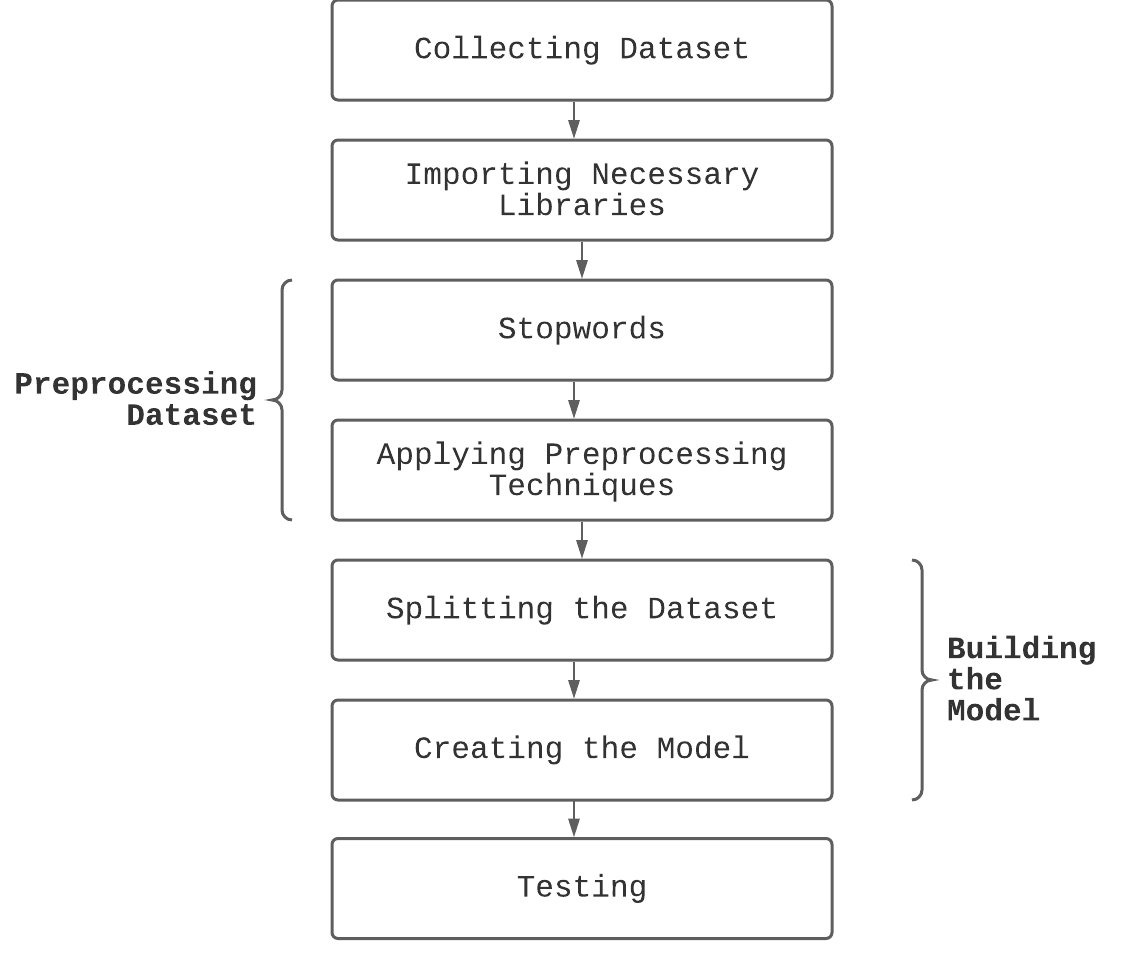

# **Step 1: The Dataset**

[**IMDB Dataset of 50K Movie Reviews**](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews) 

Columns:


1.   Review (String)
2.   Sentiment (String)

# **Step 2: Importing Libraries**

**Pandas** 

Open source data analysis and manipulation tool.

**NumPy** 

High performance numerical computation library inspired by MatLab and Native C.

**NLTK (Natural Language Toolkit)** 

A set of libraries and programs used for symbolic and statistical natural language processing of English.


In [2]:
# Data manipulation
import pandas as pd
#import numpy as np
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.



**Scikit-learn** 

Machine Learning library that has various classification, regression and cluster algorithms.

In [3]:
# Machine learning
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# **Preprocessing Data**

# **Step 3: Stopwords**

**Stopwords**

A set of commonly used words in a language (determiners, coordinate conjunctions, prepositions. etc).

These word are filtered out before or after processing natural language data. This allows us to focus on the important words.

Example: There is **an** umbrella.

Popular Stopword Lists:

1. [Terrier Stopword List](https://github.com/kavgan/stop-words/blob/master/terrier-stop.txt)

2. [Snowball Stopword List](http://snowball.tartarus.org/algorithms/english/stop.txt)

3. [Stopword Lists for 19 Languages](https://www.kaggle.com/rtatman/stopword-lists-for-19-languages)




In [4]:
# Stopwords (using NLTK for list)
stopword_list = set(stopwords.words('english'))

# **Step 4: Applying Preprocessing Techniques on the Textual Data**





 **Casing**

 Converting the textual data to either all upper or lower case.

 **Noise Removal**

 Removal of character digits and other pieces of data that can interfere with text analysis.

In this project we removed:


*   URLs
*   Punctuation
*   Symbols


 **Tokenization**

 A method of separating texts into smaller units called tokens. 

 **Stopword Removal**
 
 Refer to previous text block.

 **Text Normalization**
  *   **Stemming**

  Stemming programs are commonly referred to as stemming algorithms or stemmers. In this process you cutt prefixes and suffixes to produce a base word. This is technique is effective but contains certain limitations.

    **Example:** fishing -> fish


  *   **Lemmatization**
  
  What is a lemma?

  In morphology and lexicography, a lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words (headword). In English, for example, run, runs, ran and running are forms of the same lexeme, with run as the lemma by which they are indexed.

  Lemmatization is the process of converting words into lemmas by considering the morphological analysis of the word.

    **Example:** am, are, is -> be

In [5]:
# Function to do all the preprocesssing
def preprocess_review(review):

    # Casing
    review = review.lower()

    # Remove URLs
    review = re.sub(r"http\S+|www\S+|https\S+", "", review, flags = re.MULTILINE)

    # Removing punctuation and other symbols
    review = review.translate(str.maketrans("", "", string.punctuation))
    review = re.sub(r'\@\w+|\#', "", review)


    # Tokenize
    review_tokens = word_tokenize(review)

    # Remove stopwords
    filtered_words = [word for word in review_tokens if word not in stopword_list]

    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos = 'a') for w in filtered_words]

    return " ".join(lemma_words)

 **Lambda Function**

  Single-line function declared with no name, which can have any number of arguments, but it can only have one expression. Such a function is capable of behaving similarly to a regular function declared using the Python's def keyword. Often times a lambda function is passed as an argument to another function.

In [6]:
# Lambda function for preprocessing function
cleaned_text = lambda x: preprocess_review(x)


preprocess_review("Hello, this is a Test Line #@ ...")

'hello test line'

# **Uploading the Dataset**

How to mount google drive in colab:

https://www.youtube.com/watch?v=zYHVzPV3djs

https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

https://colab.research.google.com/notebooks/io.ipynb



In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Implementation of preprocessing function:**

We use the read_csv() method from the Pandas library to read the dataset.

We then use our lambda function to clean each text and add the new processed text to a column named "cleaned_review".

In [8]:
import io
dataset = pd.read_csv('/content/drive/MyDrive/Sentiment_Analysis/Colab Notebooks/IMDB_Dataset.csv')
dataset.shape

(50000, 2)

In [9]:
# Looking at the raw data of the dataset
dataset.head(10)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [10]:
# Information on the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [11]:
# Running our lambda function on the dataset
dataset['cleaned_review'] = pd.DataFrame(dataset.review.apply(cleaned_text))

In [12]:
dataset.head(10)

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...
5,"Probably my all-time favorite movie, a story o...",positive,probably alltime favorite movie story selfless...
6,I sure would like to see a resurrection of a u...,positive,sure would like see resurrection dated seahunt...
7,"This show was an amazing, fresh & innovative i...",negative,show amazing fresh innovative idea 70s first a...
8,Encouraged by the positive comments about this...,negative,encouraged positive comments film looking forw...
9,If you like original gut wrenching laughter yo...,positive,like original gut wrenching laughter like movi...


# **Building The Model**

In the dataset, we have our **independent variables** (review) and **dependent variable** (sentiment). While most of the data will be used for teaching the model, we wil keep some aside for validation.

# **Step 5: Splitting the Dataset**

In [13]:
review = dataset.cleaned_review
sentiment = dataset.sentiment

IV_train, IV_test, DV_train, DV_test = train_test_split(review, sentiment, test_size = 0.1, random_state = 5)

print('IV_train :', len(IV_train))
print('IV_test :', len(IV_test))
print('DV_train :', len(DV_train))
print('DV_test :', len(DV_test))

IV_train : 45000
IV_test : 5000
DV_train : 45000
DV_test : 5000


#**Step 6: Creating Pipeline and Fitting Data**

### **Term Frequency-Inverse Document Frequency (TF-IDC) Vectorization**

**TF-IDF**

A statistical measure that evaluates how relevant a word is to a document in a collection of documents.

<br>

**Term Frequency**

The number of times a certain term occurs in a sentence with respect to the total number of terms in the sentence.


TF = (no. on times a word repeats in a sentence) / (no. of words in a sentence)

<br>

**Inverse Document Frequency**

The rareness of a term.

IDF = log((no. of sentences) / (no. of sentences containing words))

<br>

**Vectorizing**

After using TF-IDF on our reviews, we convert them into vectors with respect to the sentences.

<br><br>

###**Logistic Regression using solver lbfgs**
**Regression**

A type of predictive modeling technique which is used to find the relationship between a dependent variable with one or multiple independent variables.

<br>

**Logistic Regression**

A classification algorithm used to predict binary outcome based on a set of independent variables.

<br><br>

###**Pipieline**

A pipeline enables us to assemble several steps that can be cross-validated tegether while setting different parameters.




In [14]:
# Preparing TF-IDF vectorizer
tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = 'lbfgs')

# Building our pipeline
model = Pipeline([('vectorizer', tvec), ('classifier', clf2)])
model.fit(IV_train, DV_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, inter

In [15]:
predictions = model.predict(IV_test)
confusion_matrix(predictions, DV_test)

array([[2152,  227],
       [ 292, 2329]])

In [16]:
print("Accuracy : ", accuracy_score(predictions, DV_test))
print("Percision : ", precision_score(predictions, DV_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, DV_test, average = 'weighted'))

Accuracy :  0.8962
Percision :  0.8965986531482036
Recall :  0.8962


# **Step 7: Testing**

In [17]:
example = ["This movie was amazing!"] # PUT IN EXAMPLE HERE
result = model.predict(example)

print(result)

['positive']
